In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
sns.get_dataset_names()     # 라이브러리에서 제공되는 데이터셋

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [150]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<Axes: xlabel='total_bill', ylabel='tip'>

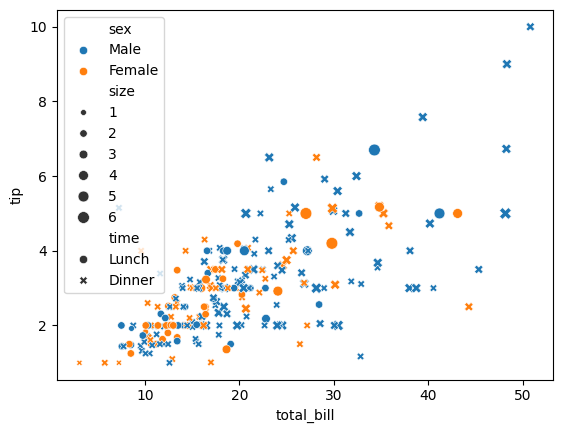

In [151]:
# .scatterplot() ㅡ 일반 산점도도
sns.scatterplot(x='total_bill', y='tip', 
                hue="sex", style='time', 
                size="size", data=tips)

<Axes: xlabel='total_bill', ylabel='tip'>

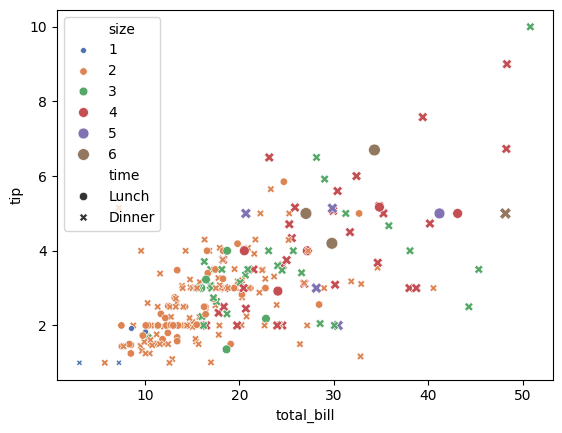

In [152]:
sns.scatterplot(x='total_bill', y='tip', 
                hue="size", palette="deep", style='time', 
                size="size", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

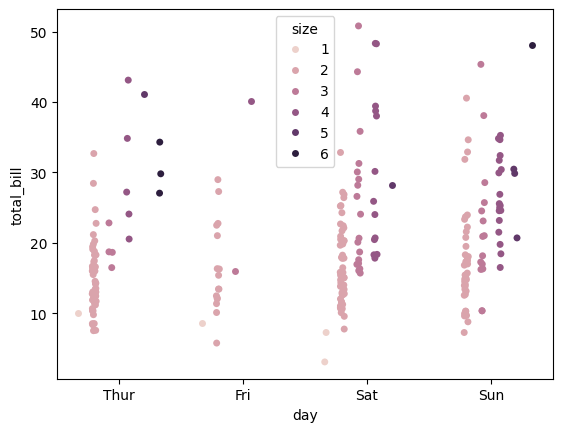

In [153]:
# .stripplot() ㅡ 단순 분포를 빠르게 확인하는 산점도
sns.stripplot(x="day", y="total_bill",
              jitter=True,  # 데이터간 겹쳐서 표현
              hue="size",   # 색상으로 그룹 구분
              dodge=True,   # 카테고리드을 나란히 배치
              data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

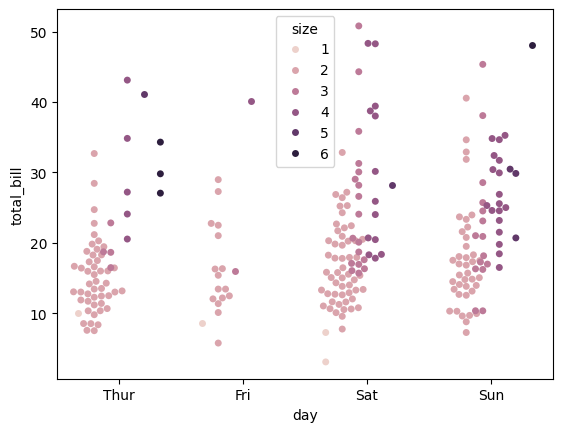

In [154]:
# .swqarmplot() ㅡ 정확한 데이터 분포 확인하는 산점도 (데이터간 겹치지 않도록)
sns.swarmplot(x="day", y="total_bill",
              data=tips,
              hue="size", dodge=True)

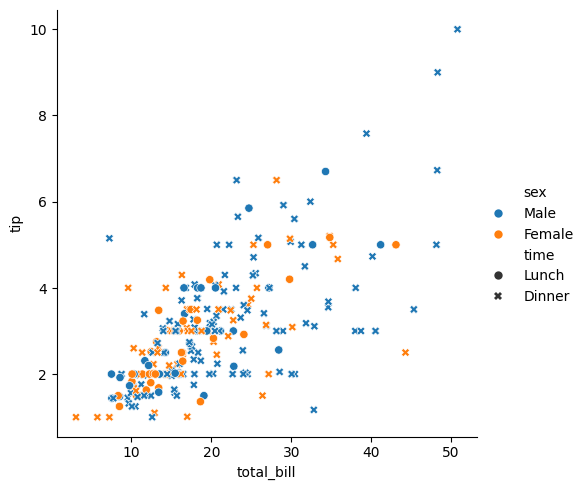

In [155]:
# .relplot ㅡ 관계형 plot
sns.relplot(x="total_bill", y='tip', data=tips,
            style="time", hue="sex")

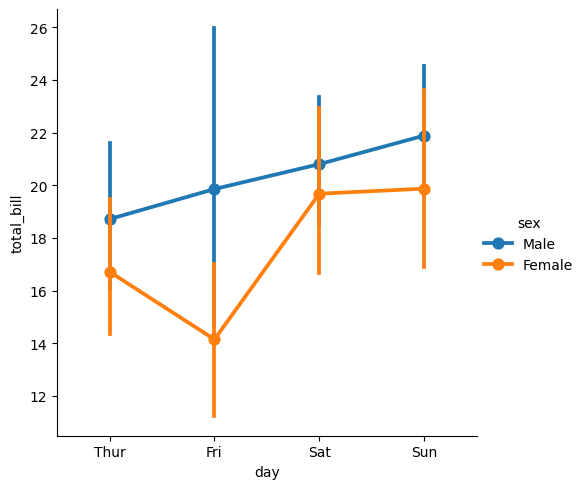

In [156]:
# .catplot() ㅡ 카테고리형 데이터 시각화
sns.catplot(x='day', y='total_bill', data=tips,
            hue='sex', kind="point")


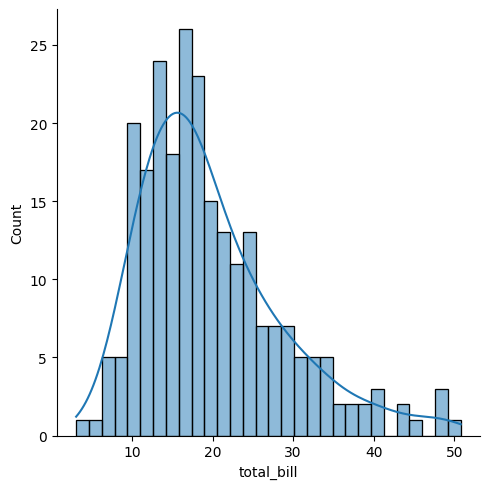

In [157]:
sns.displot(tips['total_bill'], bins=30, kde=True)



<Axes: >

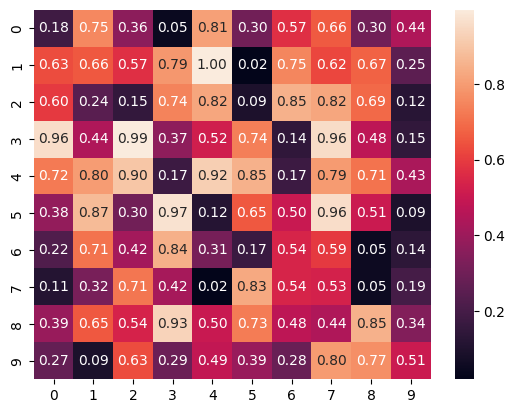

In [158]:
import numpy as np
data=np.random.rand(10,10)
sns.heatmap(data, annot=True, fmt=".2f")

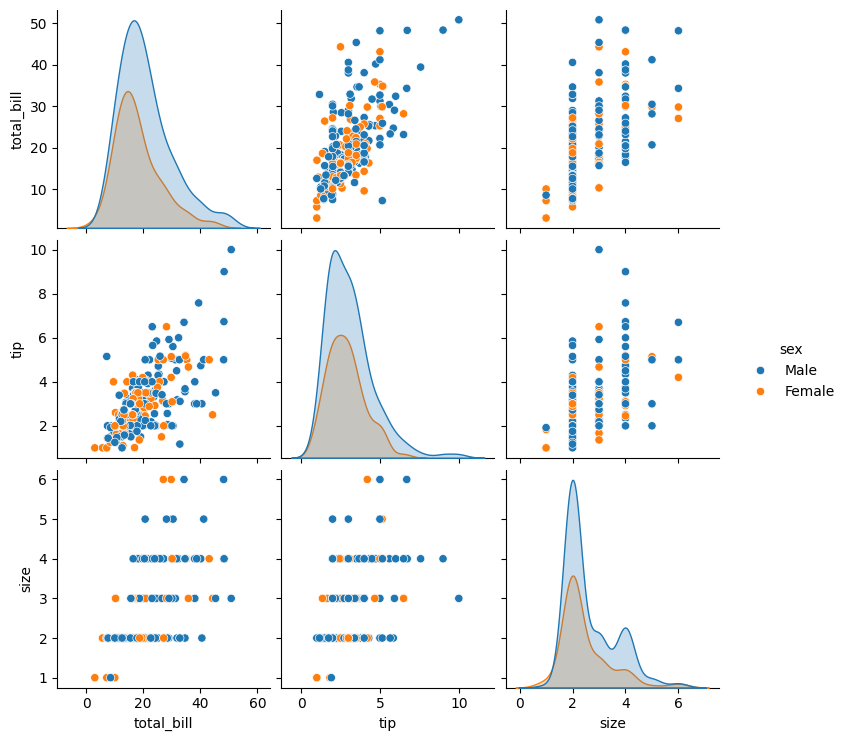

In [159]:
sns.pairplot(tips, hue="sex")

<Axes: xlabel='total_bill', ylabel='tip'>

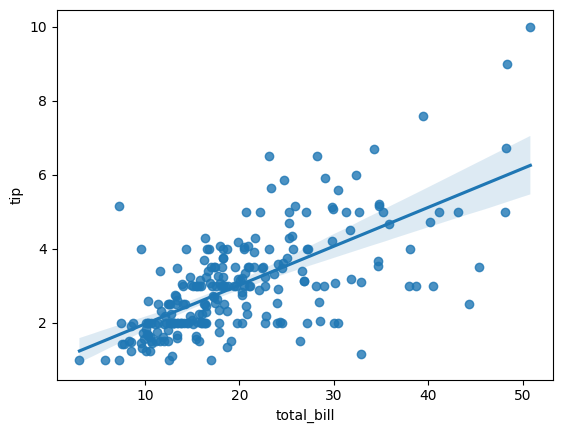

In [160]:
# .regplot() ㅡ 회귀선 x 산점도
sns.regplot(x='total_bill', y='tip', data=tips)

In [201]:
# 실습1. 데이터 분석 후 그래프 그리기
penguins = sns.load_dataset("penguins")
penguins.head(3)
penguins.info()
penguins.groupby('species')['body_mass_g'].mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

Text(0.5, 1.0, 'Average Weights by Species')

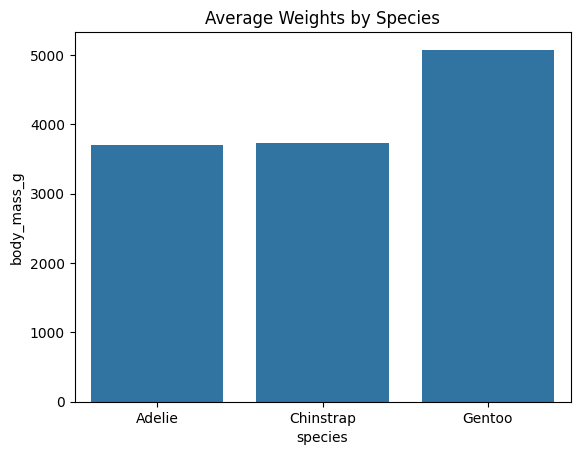

In [202]:

# 실습1. 데이터 분석 후 그래프 그리기
# 1-1) 펭귄 종(species)별 평균몸무게(body_mass_g)의 막대그래프
penguins = sns.load_dataset("penguins")
sns.barplot(x='species', y='body_mass_g', data=penguins, errorbar=None)
plt.title("Average Weights by Species")


Text(0.5, 1.0, 'Bill Lenth  x  Bill Depth')

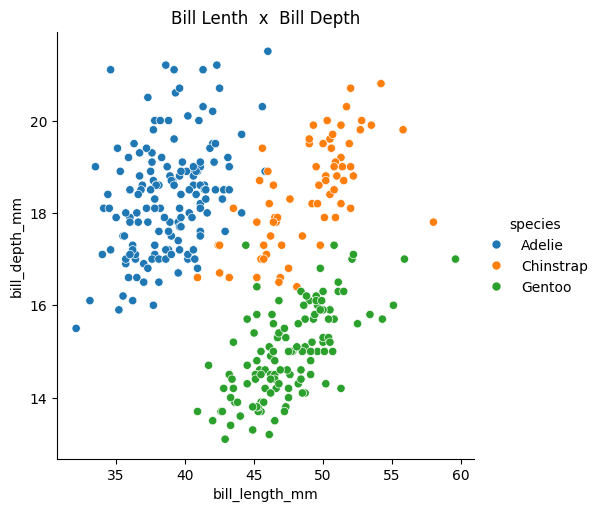

In [162]:

# 1-2) 부리길이(bill_length_mm)와 부리 깊이(bill_depth_mm) 관계 산점도
sns.relplot(x='bill_length_mm', y='bill_depth_mm', data=penguins,
                hue="species")
plt.title("Bill Lenth  x  Bill Depth")


Text(0.5, 1.0, 'Weight by Island')

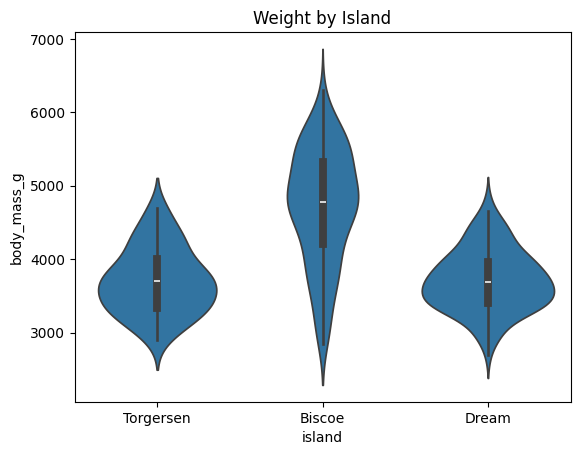

In [163]:

# 1-3) 펭귄 섬(island)에 따른 몸무게 분포의 violinplot
# penguins.value_counts('island')
sns.violinplot(x='island', y='body_mass_g', data=penguins)
plt.title("Weight by Island")

In [164]:
# 실습2. 데이터 분석 후 그래프 그리기
flights = sns.load_dataset("flights")
# flights.head(3)
# flights.info()

Text(0.5, 1.0, '2-1) Average of Passengers by Year')

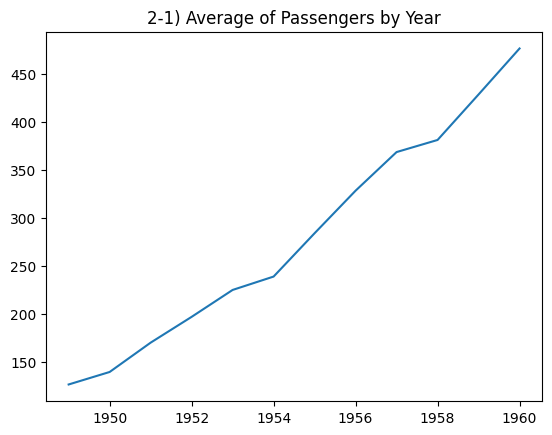

In [ ]:
# 2-1) 연도(yaer)별 승객 수(passengers)평균의 꺾은선 그래프
avg_passengers = list(flights.groupby('year')['passengers'].mean())
years = list(flights['year'].value_counts().index)
plt.plot(years, avg_passengers)
plt.title("2-1) Average of Passengers by Year")
"""  ㅡ 리더님 코드
# 연도별 평균
avg = flights.groupby('year')['passengers'].mean().resset_index()
plt.plot(avg['year'], avg['passengers'])
"""

Text(0.5, 1.0, '2-2) Passengers by year and month')

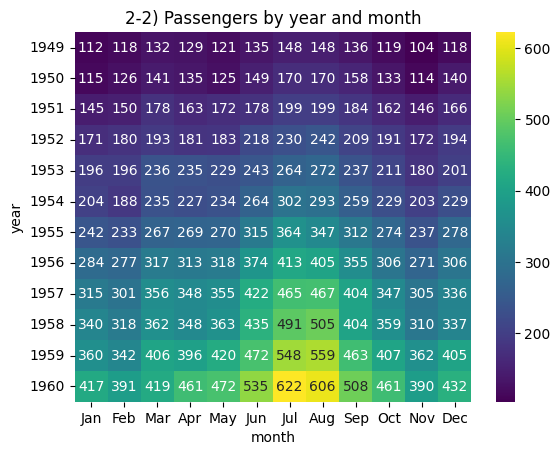

In [ ]:
# 2-2) 연도와 월별 승객수의 히트맵
pivot_data=flights.pivot(index='year', columns='month', values='passengers')
sns.heatmap(pivot_data, annot=True, fmt="d", cmap="viridis")
plt.title("2-2) Passengers by year and month")

""" 리더님 코드
pivot=flights.pibot(index='month', columns='year', values='passengers')
sns.heatmap(pivot, annot=True, fmt='d')
"""

Text(0.5, 1.0, '2-3) Monthly Passengers in 1957')

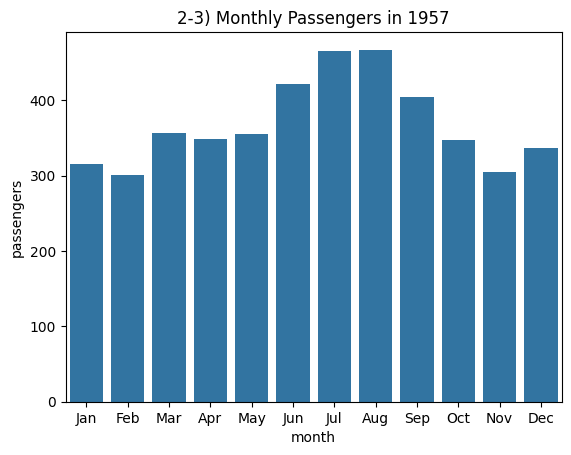

In [172]:
# 2-3) 특정 연도의 월별 승객수
year = 1957
data_year = flights.loc[flights['year']==year]
# data_year.head(3)
sns.barplot(x='month', y='passengers', data=data_year)
plt.title(f"2-3) Monthly Passengers in {year}")

Text(0.5, 1.0, '3-1) Class - Survived')

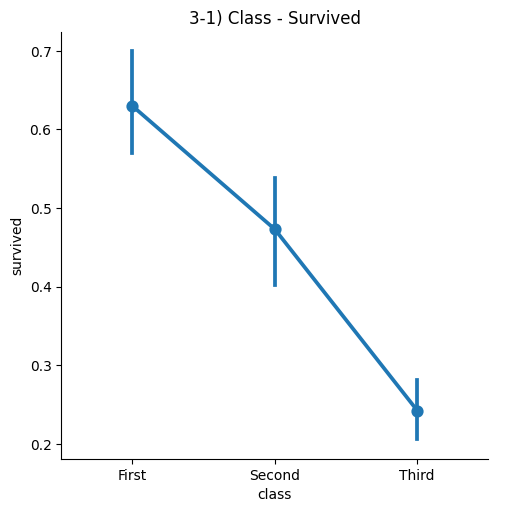

In [ ]:
# 실습3. 데이터 분석 후 그래프 그리기
titanic = sns.load_dataset("titanic")
# titanic.head(3)
# titanic.info()

# 3-1) 탑승 클래스(class)와 생존여부(survived)간의 catplot
sns.catplot(x='class', y='survived', data=titanic, kind='point')
plt.title("3-1) Class - Survived")


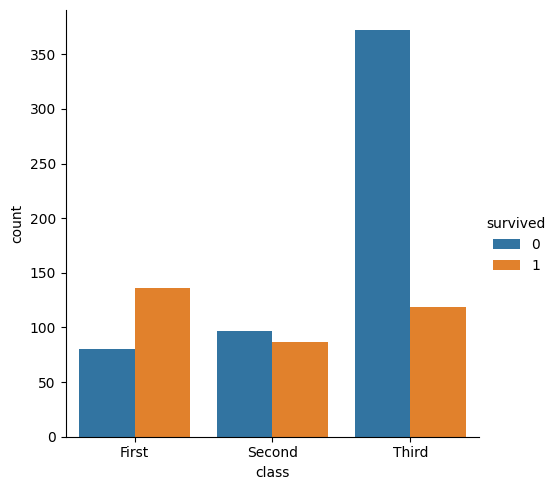

In [203]:

# 3-1) 리더님 코드
sns.catplot(x='class', hue='survived', data=titanic, kind='count')


Text(0.5, 1.0, '3-2) Age - Survived')

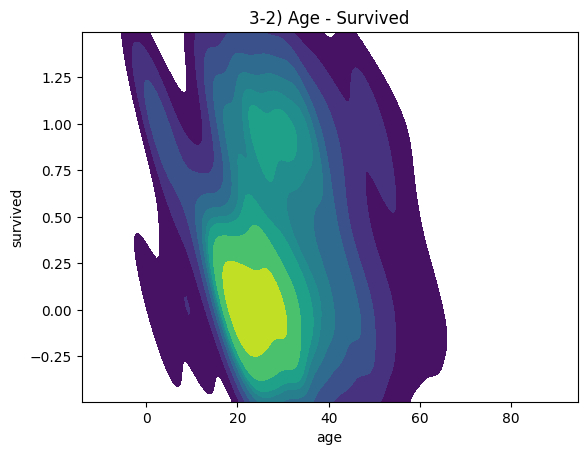

In [193]:

# 3-2) 나이(age)와 생존여부(survived)간의 kdeplot
sns.kdeplot(x='age', y='survived', data=titanic,
            cmap='viridis', fill=True)
plt.title("3-2) Age - Survived")

Text(0.5, 1.0, '1D KDE Plot')

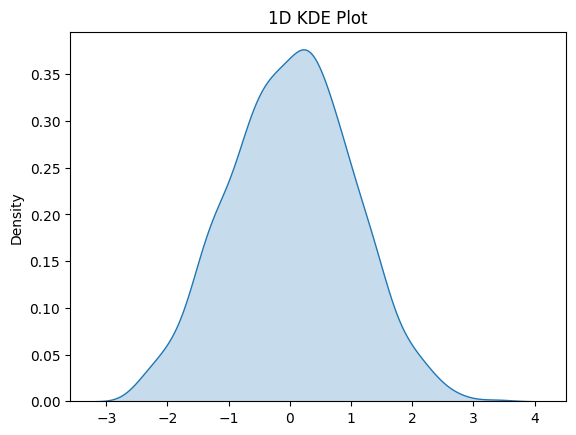

In [191]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
data = np.random.randn(1000)

# KDE 플롯 생성
sns.kdeplot(data, fill=True)

# 그래프 출력
plt.title('1D KDE Plot')


Text(0.5, 1.0, '2D KDE Plot')

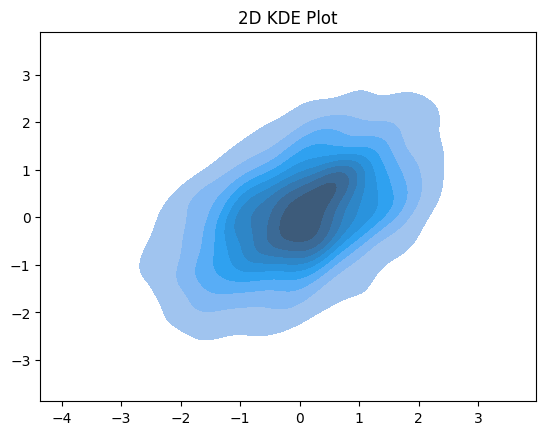

In [192]:
# 2차원 데이터 준비
mean, cov = [0, 0], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 1000)
x, y = data.T

# 2D KDE 플롯 생성
sns.kdeplot(x=x, y=y, fill=True)

# 그래프 출력
plt.title('2D KDE Plot')



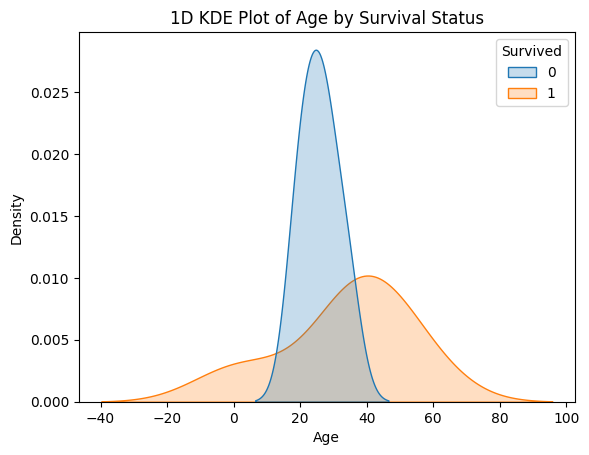

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 예제 데이터 준비
data = {
    'Survived': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Age': [22, 38, 26, 35, 28, 2, 34, 54, 19, 40]
}
df = pd.DataFrame(data)

# 1차원 KDE 플롯 생성
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)

# 그래프 제목 추가
plt.title('1D KDE Plot of Age by Survival Status')

# 그래프 출력
plt.show()


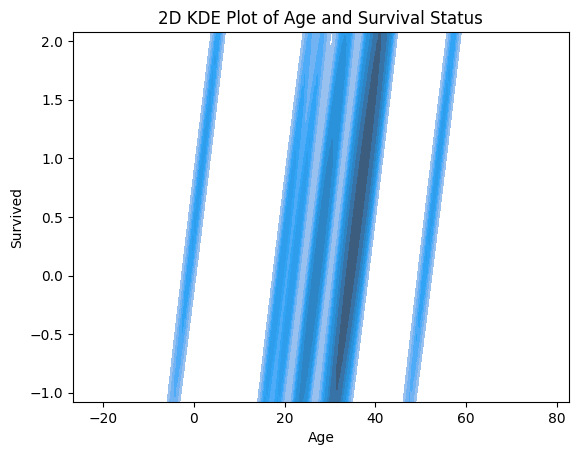

In [196]:
# 2차원 데이터 준비
data = {
    'Survived': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Age': [22, 38, 26, 35, 28, 2, 34, 54, 19, 40]
}
df = pd.DataFrame(data)

# 2차원 KDE 플롯 생성
sns.kdeplot(data=df, x='Age', y='Survived', fill=True)

# 그래프 제목 추가
plt.title('2D KDE Plot of Age and Survival Status')

# 그래프 출력
plt.show()
